# **Course 7**

# **1**
After completing the exercises on lists and tuples, Jimmy noticed that, according to his estimate_average_slot_payout function, the slot machines at the Learn Python Casino are actually rigged against the house, and are profitable to play in the long run.

Starting with $200 in his pocket, Jimmy has played the slots 500 times, recording his new balance in a list after each spin. He used Python's matplotlib library to make a graph of his balance over time:

In [ ]:
# Import the jimmy_slots submodule
from learntools.python import jimmy_slots
# Call the get_graph() function to get Jimmy's graph
graph = jimmy_slots.get_graph()
graph

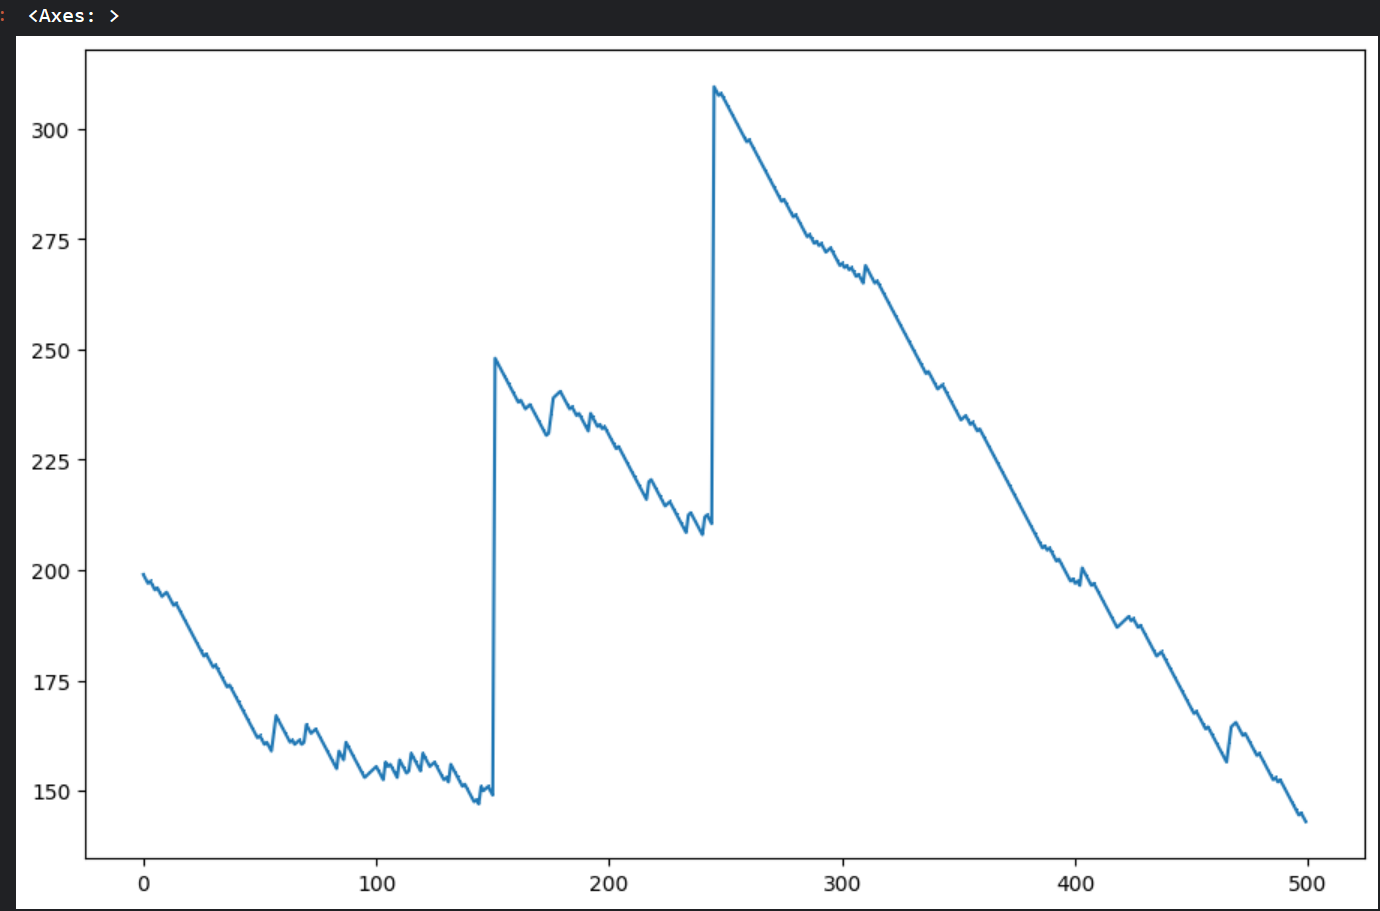

In [ ]:
def prettify_graph(graph):
    graph.set_title("Results of 500 slot machine pulls")
    # Make the y-axis begin at 0
    graph.set_ylim(bottom=0)
    # Label the y-axis
    graph.set_ylabel("Balance")
    # Bonus: format the numbers on the y-axis as dollar amounts
    # An array of the values displayed on the y-axis (150, 175, 200, etc.)
    ticks = graph.get_yticks()
    # Format those values into strings beginning with dollar sign
    new_labels = ['${}'.format(int(amt)) for amt in ticks]
    # Set the new labels
    graph.set_yticklabels(new_labels)

graph = jimmy_slots.get_graph()
prettify_graph(graph)
graph

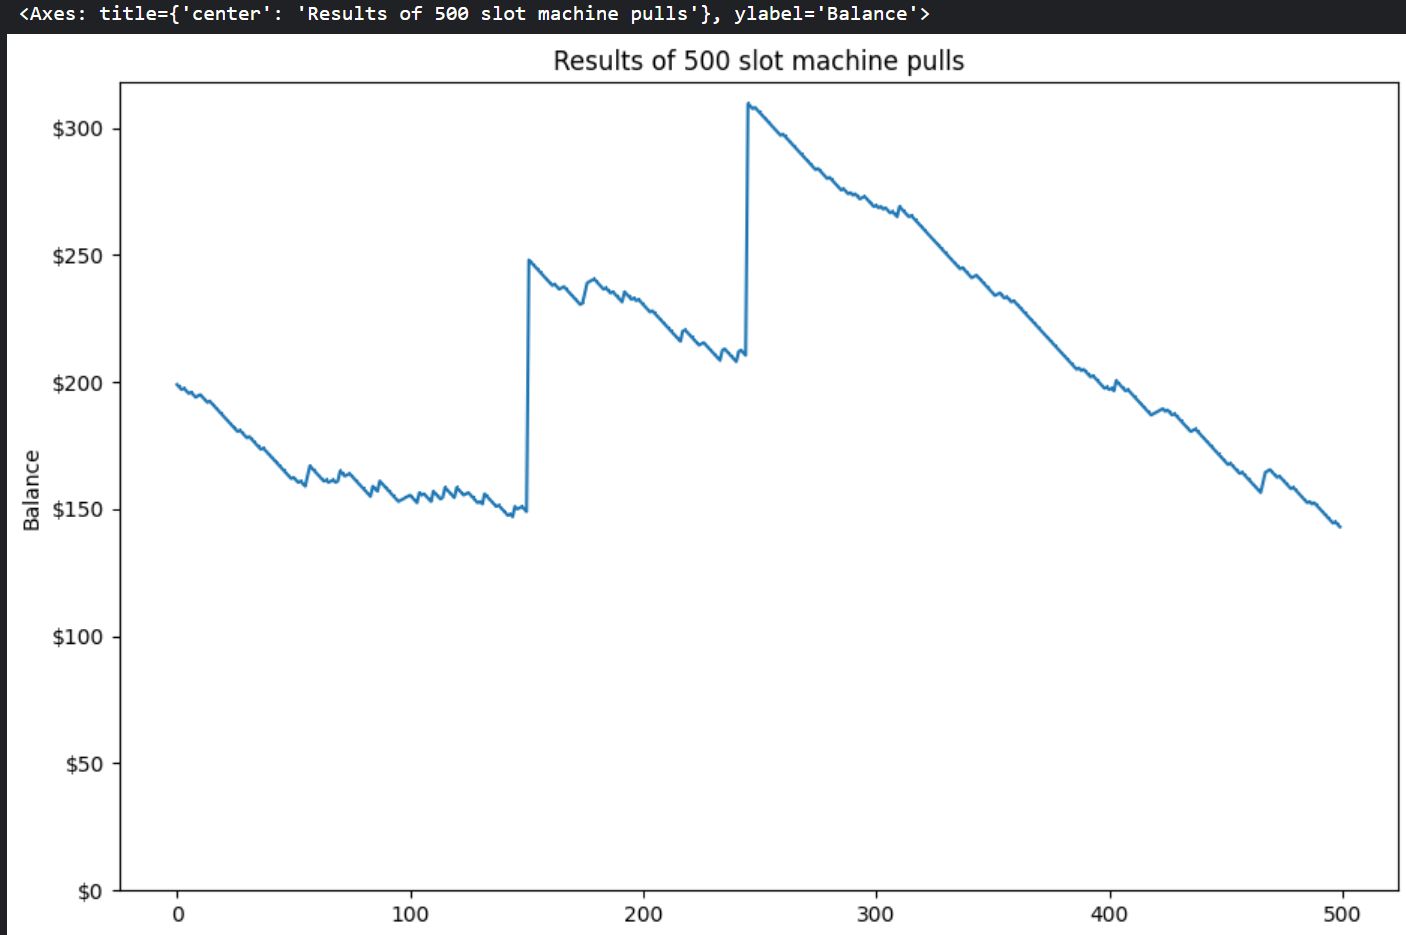

# **2**

This is a very challenging problem. Don't forget that you can receive a hint!

Luigi is trying to perform an analysis to determine the best items for winning races on the Mario Kart circuit. He has some data in the form of lists of dictionaries that look like...

[
    {'name': 'Peach', 'items': ['green shell', 'banana', 'green shell',], 'finish': 3},
    {'name': 'Bowser', 'items': ['green shell',], 'finish': 1},
    # Sometimes the racer's name wasn't recorded
    {'name': None, 'items': ['mushroom',], 'finish': 2},
    {'name': 'Toad', 'items': ['green shell', 'mushroom'], 'finish': 1},
]


'items' is a list of all the power-up items the racer picked up in that race, and 'finish' was their placement in the race (1 for first place, 3 for third, etc.).

He wrote the function below to take a list like this and return a dictionary mapping each item to how many times it was picked up by first-place finishers.

In [58]:
def best_items(racers):
    """Given a list of racer dictionaries, return a dictionary mapping items to the number
    of times those items were picked up by racers who finished in first place.
    """
    winner_item_counts = {}
    for i in range(len(racers)):
        # The i'th racer dictionary
        racer = racers[i]
        # We're only interested in racers who finished in first
        if racer['finish'] == 1:
            for i in racer['items']:
                # Add one to the count for this item (adding it to the dict if necessary)
                if i not in winner_item_counts:
                    winner_item_counts[i] = 0
                winner_item_counts[i] += 1

        # Data quality issues :/ Print a warning about racers with no name set. We'll take care of it later.
        if racer['name'] is None:
            print("WARNING: Encountered racer with unknown name on iteration {}/{} (racer = {})".format(
                i+1, len(racers), racer['name'])
                 )
    return winner_item_counts

In [59]:
sample = [
    {'name': 'Peach', 'items': ['green shell', 'banana', 'green shell',], 'finish': 3},
    {'name': 'Bowser', 'items': ['green shell',], 'finish': 1},
    {'name': None, 'items': ['mushroom',], 'finish': 2},
    {'name': 'Toad', 'items': ['green shell', 'mushroom'], 'finish': 1},
]
best_items(sample)

{'green shell': 2, 'mushroom': 1}

In [ ]:
# Import dataset
from learntools.python.luigi_analysis import full_dataset

def best_items(racers):
    winner_item_counts = {}

    for idx in range(len(racers)):  # Ganti i dengan idx
        racer = racers[idx]

        # Hanya untuk yang finish di urutan pertama
        if racer['finish'] == 1:
            for item in racer['items']:  # Ganti i dengan item
                winner_item_counts[item] = winner_item_counts.get(item, 0) + 1

        # Periksa jika nama tidak tersedia
        if racer['name'] is None:
            print(f"WARNING: Encountered racer with unknown name on iteration {idx}/{len(racers)}")

    return winner_item_counts

# Coba analisis dataset
best_items(full_dataset)


{'green shell': 4, 'banana': 1, 'red shell': 1, 'blue shell': 1, 'star': 1}

# **3**
Suppose we wanted to create a new type to represent hands in blackjack. One thing we might want to do with this type is overload the comparison operators like > and <= so that we could use them to check whether one hand beats another. e.g. it'd be cool if we could do this:
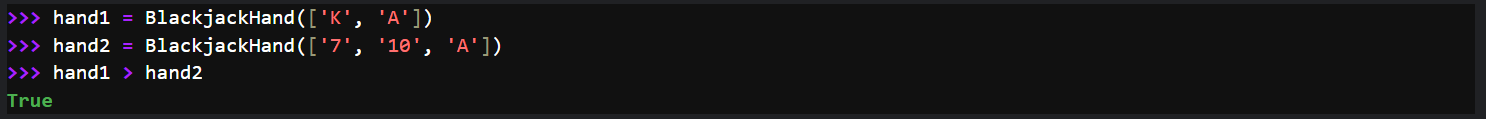

Fill in the body of the blackjack_hand_greater_than function according to the docstring.

In [57]:
def hand_total(hand):
    """Helper function to calculate the total points of a blackjack hand.
    """
    total = 0
    # Count the number of aces and deal with how to apply them at the end.
    aces = 0
    for card in hand:
        if card in ['J', 'Q', 'K']:
            total += 10
        elif card == 'A':
            aces += 1
        else:
            # Convert number cards (e.g. '7') to ints
            total += int(card)
    # At this point, total is the sum of this hand's cards *not counting aces*.

    # Add aces, counting them as 1 for now. This is the smallest total we can make from this hand
    total += aces
    # "Upgrade" aces from 1 to 11 as long as it helps us get closer to 21
    # without busting
    while total + 10 <= 21 and aces > 0:
        # Upgrade an ace from 1 to 11
        total += 10
        aces -= 1
    return total

def blackjack_hand_greater_than(hand_1, hand_2):
    total_1 = hand_total(hand_1)
    total_2 = hand_total(hand_2)
    return total_1 <= 21 and (total_1 > total_2 or total_2 > 21)
    pass

# Check your answer
print(blackjack_hand_greater_than(['K'], ['3', '4']))
print(blackjack_hand_greater_than(['Q'], ['2', '5']))

True
True
